# Burst Fitting example using MCMC

`BurstFit` can also use MCMC for burst fitting. To do that we first fit the data using `curve_fit` using the functions discussed in other tutorials, and then the results of `curve_fit` are used as initial guess in MCMC. But this is not necessary. 

MCMC is done using `MCMC` class and ideally it can take any initial guess to do the MCMC. Using the converged values from `curve_fit` is just convenient. 

In [7]:
from burstfit.fit import BurstFit
from burstfit.data import BurstData
from burstfit.model import Model, SgramModel
from burstfit.utils.plotter import plot_2d_fit
from burstfit.utils.functions import gauss_norm, pulse_fn_vec, sgram_fn_vec
from burstfit.io import BurstIO

import numpy as np
import logging

import sys
sys.path.insert(1, '/home/ubuntu/gechen/software')
import filplot_funcs_gc as ff

%matplotlib inline

In [8]:
logging_format = "%(asctime)s - %(funcName)s -%(name)s - %(levelname)s - %(message)s"
logging.basicConfig(
    level=logging.INFO,
    format=logging_format,
)

## Read data

In [9]:
fil_file='/data/dsa110/T1/corr09/2021_10_8_0_29_27/fil_211009aacy/211009aacy_175.fil'

## Initial Fit

In [10]:
# fil_211009aacy 
bd = BurstData(
    fp=fil_file,
    dm=56.2,
    tcand=0.5, # pulse starting time in s.
    width=4, # width = 4 or 2^4 in time sample?  
    snr=27.0, 
)

bd.prepare_data(time_window=0.1) 

2021-10-27 19:41:14,176 - prepare_data -burstfit.data - INFO - Preparing data for burst fitting.
2021-10-27 19:41:14,210 - crop_dedispersed_data -burstfit.data - INFO - Cropping data with time_window: 0.1s.
2021-10-27 19:41:14,214 - normalise_data -burstfit.data - INFO - Normalising data using off pulse mean and std.
2021-10-27 19:41:14,223 - normalise_data -burstfit.data - INFO - Off pulse mean and std are: (35.793424981901545, 21.16958290571877)


Using <class 'str'>:
/data/dsa110/T1/corr09/2021_10_8_0_29_27/fil_211009aacy/211009aacy_175.fil

In [11]:
data, datadm, tsdm0, dms, datadm0 = ff.proc_cand_fil(fil_file, bd.dm, bd.width, nfreq_plot=256, ndm=128) 
data_burst = data[:,int(0.45/bd.tsamp): int(0.55/bd.tsamp)]
sgram_mask = np.full(np.shape(data_burst), False)


2021-10-27 19:42:32,297 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2021-10-27 19:42:32,300 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2021-10-27 19:42:32,307 - tests -root - INFO - P values: T-test (0.81418), Kruskal (0.54181), KS (0.99093), F-test (0.74729)
2021-10-27 19:42:32,310 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (L) test
2021-10-27 19:42:32,317 - tests -root - INFO - P values: T-test (0.00005), Kruskal (0.00010), KS (0.01669), F-test (0.24186)
2021-10-27 19:42:32,321 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (R) test
2021-10-27 19:42:32,328 - tests -root - INFO - P values: T-test (0.00011), Kruskal (0.00089), KS (0.05402), F-test (0.08593)
2021-10-27 19:42:32,331 - run_tests -burstfit.fit - INFO - On pulse residual is similar to right off pulse region.
2021-10-27 19:42:32,333 - fitall -burstfit.fit - WARNING - On pulse region looks like noise. Check candidate parameters


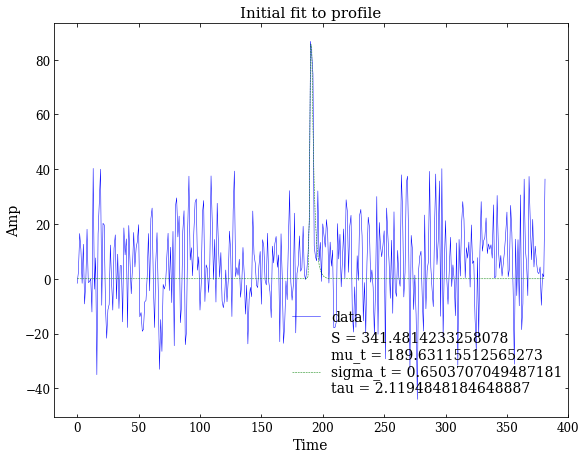

2021-10-27 19:42:32,619 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2021-10-27 19:42:32,623 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 1
2021-10-27 19:42:32,636 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2021-10-27 19:42:32,639 - initial_spectrafit -burstfit.fit - INFO - mu_f: 136.3896378625671 +- 21.565035976590853
2021-10-27 19:42:32,641 - initial_spectrafit -burstfit.fit - INFO - sigma_f: 85.16278554752265 +- 17.87624375359787


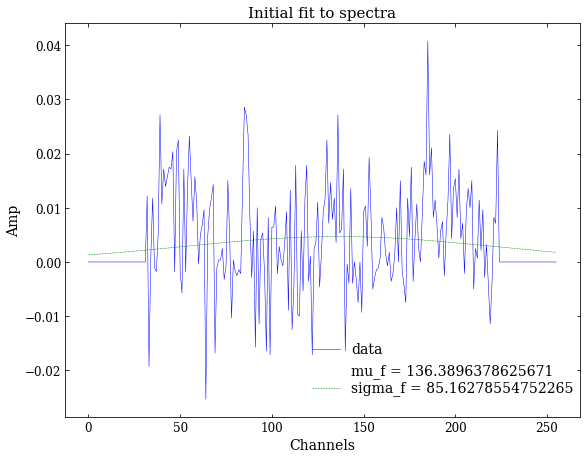

2021-10-27 19:42:32,861 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 1
2021-10-27 19:42:32,864 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [136.3896378625671, 85.16278554752265, 341.4814233258078, 189.63115512565273, 0.6503707049487181, 2.1194848184648887, 56.2]
2021-10-27 19:42:33,407 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2021-10-27 19:42:33,411 - sgram_fit -burstfit.fit - INFO - mu_f: 133.11809620109932 +- 18.5877201565018
2021-10-27 19:42:33,413 - sgram_fit -burstfit.fit - INFO - sigma_f: 101.05178336529427 +- 28.063439895109692
2021-10-27 19:42:33,416 - sgram_fit -burstfit.fit - INFO - S: 371.7412912969764 +- 78.73629854419643
2021-10-27 19:42:33,418 - sgram_fit -burstfit.fit - INFO - mu_t: 189.93456589349952 +- 0.11072840611902172
2021-10-27 19:42:33,419 - sgram_fit -burstfit.fit - INFO - sigma_t: 1.1510012806552903 +- 0.002793093807323852
2021-10-27 19:42:33,421 - sgram_fit -burstfit.fit - INFO - tau: 0

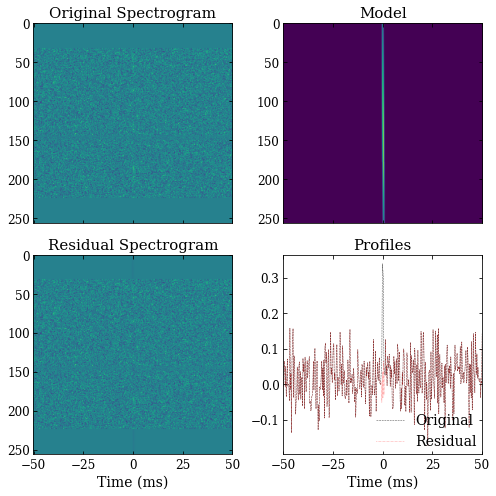

2021-10-27 19:42:33,924 - model -burstfit.fit - INFO - Making model.
2021-10-27 19:42:33,928 - model -burstfit.fit - INFO - Found 1 components.
2021-10-27 19:42:33,936 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2021-10-27 19:42:33,938 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2021-10-27 19:42:33,941 - model -burstfit.fit - INFO - Making model.
2021-10-27 19:42:33,943 - model -burstfit.fit - INFO - Found 1 components.
2021-10-27 19:42:33,956 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 0.9956940421447374
2021-10-27 19:42:33,958 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2021-10-27 19:42:33,960 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2021-10-27 19:42:33,966 - tests -root - INFO - P values: T-test (0.81418), Kruskal (0.54181), KS (0.99093), F-test (0.74729)
2021-10-27 19:42:33,968 - run

0.9956940421447374

In [12]:
profile_bounds = [] 
spectra_bounds = ([0, 0], [250, 125]) 
pnames = ['S', 'mu_t', 'sigma_t', 'tau']
snames = ['mu_f', 'sigma_f']
#bd.prepare_data()

pulseModel = Model(pulse_fn_vec, param_names=pnames)
spectraModel = Model(gauss_norm, param_names=snames)
sgramModel = SgramModel(pulseModel, spectraModel, sgram_fn_vec, 
                        mask=sgram_mask, clip_fac=bd.clip_fac)

bf = BurstFit(
    sgram_model=sgramModel,
    sgram=data_burst, #bd.sgram not working 
    width=bd.width,
    dm=bd.dm,
    foff=bd.foff,
    fch1=bd.fch1,
    tsamp=bd.tsamp,
    clip_fac=bd.clip_fac,
    mask= sgram_mask, 
    mcmcfit=False
)

bf.fitall(plot=True, profile_bounds=profile_bounds, 
          spectra_bounds=spectra_bounds)

bf.calc_redchisq()

## MCMC Fit 

Now we will use the fitted parameters from `fitall()` as initial guess to MCMC. We can set different inputs/config for MCMC in a dictionary. Here are some of those inputs: 
* nwalkers: Number of Walkers
* nsteps: Number of iterations per walker
* skip: Number os steps to skip 
* ncores: Number of cores to use 
* start_pos_dev: Percent deviation for start position of the samples
* prior_range: Percent of initial guess to set as prior range

and some more ... 

The initial guess for MCMC is taken from `sgram_params`. The initial positions of walkers are chosen randomly using `start_pos_dev` and the initial guess. The priors is also chosen using initial guess and `prior_range`. We also use parameter names to modify the priors, if possible. Hence, the priors are set based on the initial guess and some rules (eg: minimum prior for tau is 0, etc). `save_results` can be used to save the h5 file with samples, and MCMC result plots.

Ideally, `nsteps` should be really huge as we use autocorrelation analysis to check if our chains have converged. See: https://emcee.readthedocs.io/en/stable/tutorials/autocorr/. 

But this is a tutorial, so we will use a small number. 

2021-10-27 19:42:34,032 - set_initial_pos -root - INFO - Setting initial positions for MCMC.
2021-10-27 19:42:34,035 - set_initial_pos -burstfit.mcmc - INFO - Initial guess for MCMC is: [1.33118096e+02 1.01051783e+02 3.71741291e+02 1.89934566e+02
 1.15100128e+00 1.71003301e-01 5.89377539e+01]
2021-10-27 19:42:34,045 - set_priors -burstfit.mcmc - INFO - Setting priors for MCMC.
2021-10-27 19:42:34,048 - set_priors -burstfit.mcmc - INFO - Found tau in param_names. Setting its min value of prior to 0.
2021-10-27 19:42:34,050 - set_priors -burstfit.mcmc - INFO - Found sigma_t in param_names. Setting its min value of prior to 0.
2021-10-27 19:42:34,053 - set_priors -burstfit.mcmc - INFO - Found sigma_t and tau in param_names. Setting its max value of prior to 2*(max_tau_prior(0.3078059419768523) + max_sigma_t_prior(2.0718023051795225))
2021-10-27 19:42:34,055 - set_priors -burstfit.mcmc - INFO - Found S and sigma_t in param_names. Setting its max value of prior to 500*max(ts)*max_sigma_t_pr

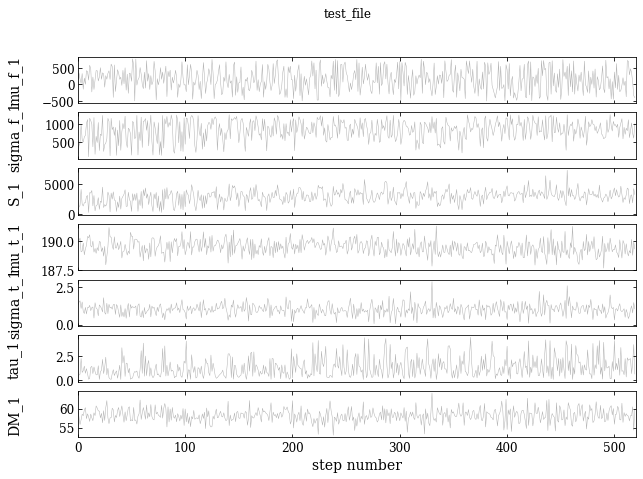

<Figure size 432x288 with 0 Axes>

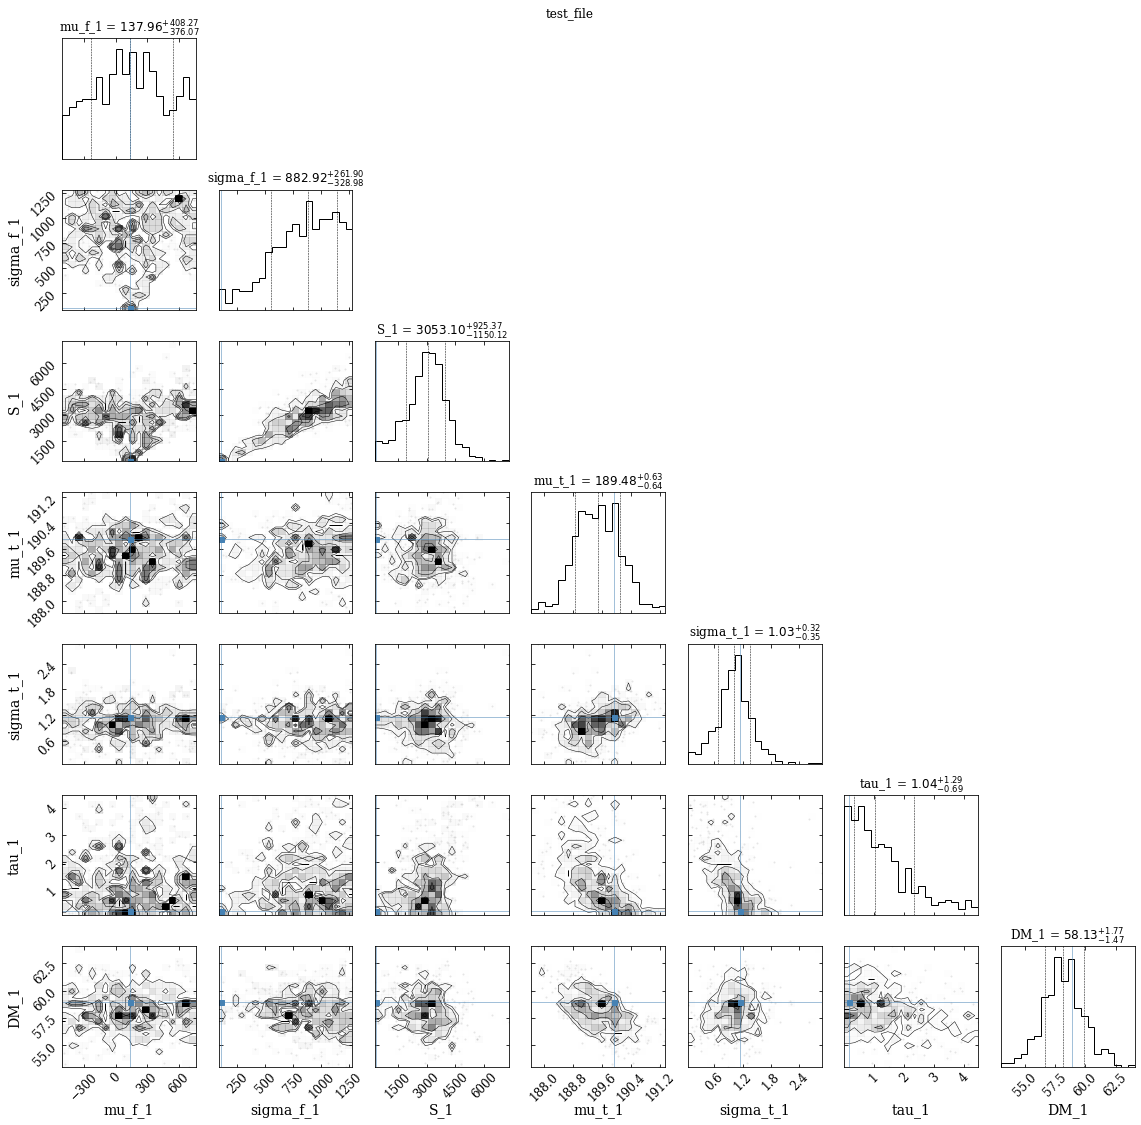

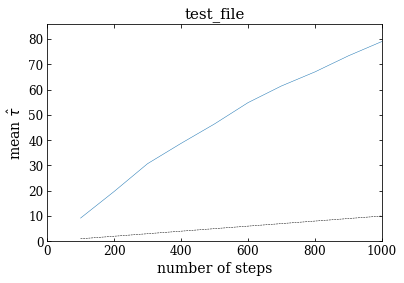

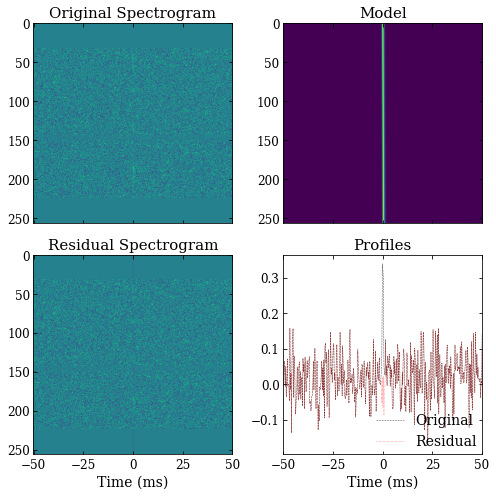

In [13]:
mcmc_kwargs = {}
mcmc_kwargs = {'nwalkers':20, 'nsteps':1000,
               'skip':500, 'ncores':4, 
               'start_pos_dev':0.01,
               'prior_range':0.8, 
               'save_results':True,
               'outname':'test_file'}
bf.run_mcmc(plot=True, **mcmc_kwargs)

The four plots above are the following: 
1. Chains for all the parameters
2. Corner plot using the MCMC samples. Blue lines show the initial guess obtained using `curve_fit`
3. Autocorrelation plot. Blue line is autocorrelation timescale, and dotted line is N/100
4. Fitting results. 

As we didn't run the MCMC for enough steps, it is not converged yet. See plot 3. But the fit results plot still looks pretty good, and corner plot shows that the parameters are exploring the region near the converged values from `curve_fit`.

the parameters are saved in `mcmc_params`

In [16]:
bf.mcmc_params

{1: {'popt': [137.95922789886413,
   882.9159770873777,
   3053.096075826682,
   189.483873983194,
   1.0307328147105188,
   1.0399610031435746,
   58.12680089140822],
  'perr': [[376.06828913246306, 408.2723779481521],
   [328.97668984517566, 261.90143361027333],
   [1150.115251851858, 925.3656865411358],
   [0.6361972885330829, 0.6281527486417247],
   [0.3489875476490306, 0.319147393281491],
   [0.6883391670819774, 1.2917550561657998],
   [1.4705989732617581, 1.7651233829299358]]}}

In [17]:
bf.reduced_chi_sq

0.9954996458448332